# Deskripsi Data

Hal ini membutuhkan pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Sampel
Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.

* `CUST ID` : Identifikasi pemegang Kartu Kredit (Kategoris)
* `BALANCE` : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
* `BALANCEFREQUENCY` : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
* `PURCHASES` : Jumlah pembelian yang dilakukan dari akun
* `ONEOFFPURCHASES` : Jumlah pembelian maksimum dilakukan dalam sekali jalan
* `INSTALLMENTSPURCHASES` : Jumlah pembelian dilakukan secara angsuran
* `CASHADVANCE` : Uang tunai di muka yang diberikan oleh pengguna
* `PURCHASESFREQUENCY` : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
* `ONEOFFPURCHASESFREQUENCY` : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
* `PURCHASESINSTALLMENTSFREQUENCY` : Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
* `CASHADVANCEFREQUENCY` : Seberapa sering uang tunai di muka dibayarkan
* `CASHADVANCETRX` : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
* `PURCHASESTRX` : Jumlah transaksi pembelian yang dilakukan
* `CREDITLIMIT` : Batas Kartu Kredit untuk pengguna
* `PAYMENTS` : Jumlah Pembayaran yang dilakukan oleh pengguna
* `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
* `PRCFULLPAYMENT` : Jumlah minimum pembayaran yang dilakukan oleh pengguna
* `TENURE` : Jangka waktu layanan kartu kredit untuk pengguna

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv('dataset/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Kita akan melihat info dari dataset kita dengan fungsi `info()`. Dan di dapati `14` tipe data **float**, `3` tipe data **integer**, `1` tipe data **object**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Exploratory Data Analysis
Kita membuat varibale baru bernama `num` untuk membuang varibel **CUST_ID**, variable `num` hanya di gunakan untuk EDA (Exploratory Data Analysis)

In [4]:
num = df.drop('CUST_ID', axis=1)
num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Kemudian kita mencari korelasi antar variabel dengan fungsi `corr()` kita bisa melihat hasilnya di bawah, namun hasil akan lebih mudah terlihat jika menggunakan visualisasi.

In [6]:
cor= num.corr(method='pearson')
print(cor)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

Dengan `heatmap` kita bisa melihat visual dari korelasi antar varibel dalam dataset.

Text(0.5, 1.0, 'Correlation Matrix')

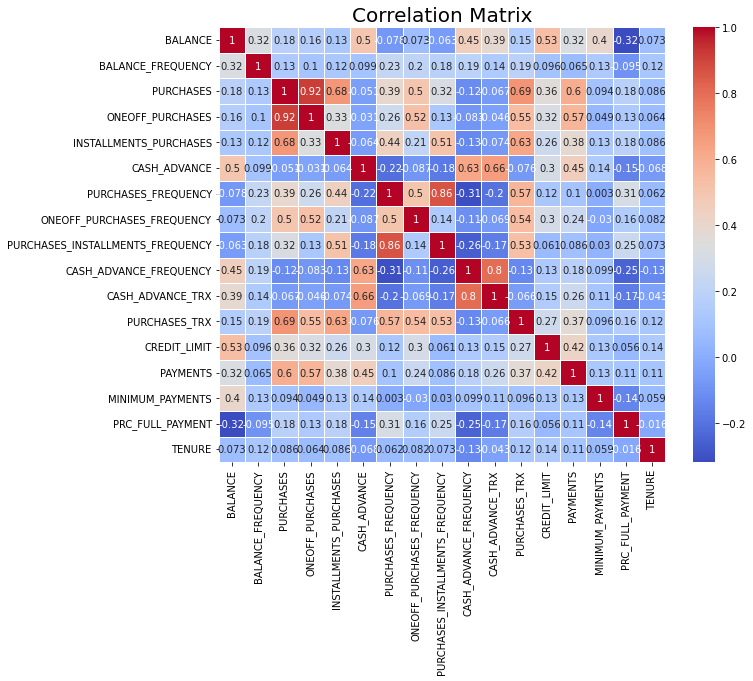

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = num.corr().round(6)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

In [8]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Selanjutnya kita akan mengecek apakah data memiliki Missing Value di dalamnya menggunakan `isnull().sum()`

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Jika di lihat pada data di atas, hanya kolom `MINUMUM_PAYMENTS` dan `CREDIT_LIMIT` yang memiliki missing value. Di sini saya memutuskan untuk mengisi nilai kosong tersebut dengan nilai mean.

In [10]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [11]:
df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [12]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [13]:
df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean(), inplace=True)

Setelah selesai melakukan pengisian nilai kosong dengan `fillna()` data pada dataset kita sudah bersih dari missing value atau nilai kosong.

In [14]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Kita juga akan melihat deskripsi dataset menggunakan `describe()`

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Serta menghapus kolom `CUST_ID` dari dataset, karena kita tidak terlalu membutuhkan nya. Oleh karena itu kolom tersebut akan kita drop, dengan `drop()`

In [16]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Dan merubah variable `df` menjadi `X`.

In [17]:
X = df
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Preparation

Pertama kita akan melakukan Standarisasi untuk semua data pada dataset kita, yang kita gunakan adalah `StandardScaler` dari Scikit-Learn

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Pada kasus kita, kita menggunakan Algoritma `K-Means` namun sebelumnya kita akan mencoba mecari `n_clusters` yang sesuai dengan melakukan perulangan.

In [20]:
from sklearn.cluster import KMeans
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X)
    clusters.append(km.inertia_)

Setelah itu kita akan menvisualisasikan hasil perulangan sekaligus memberikan output `inertia` atau nilai `n_clusters` yang sesuai dengan kasus kita. Dan di dapati 5 untuk kasus kita kali ini.

Text(0, 0.5, 'Inertia')

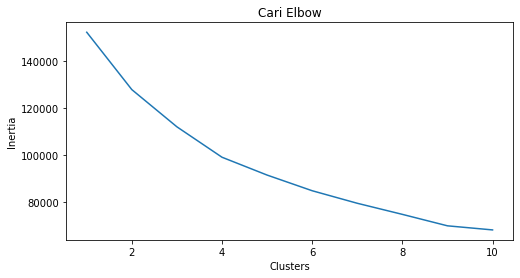

In [21]:
 # membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Sesudah mencari n_clusters yang sesuai, kita akan mencoba mereduksi semua fitur kita pada dataset.

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

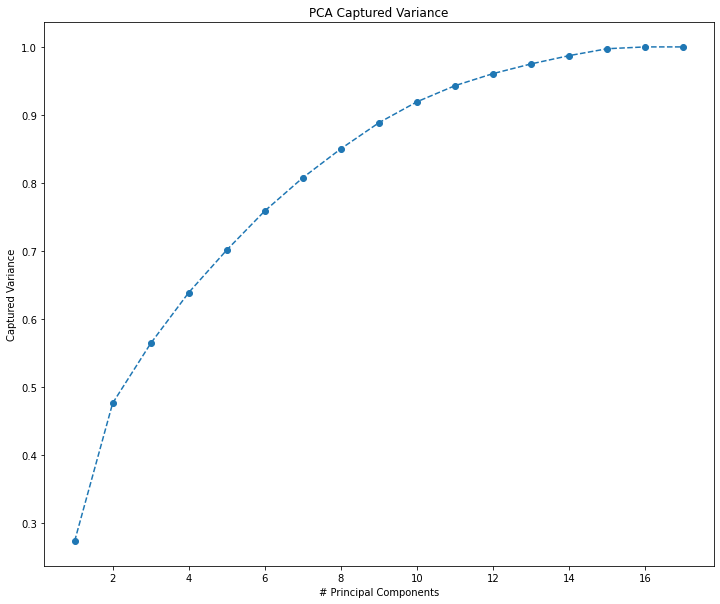

In [23]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--',)
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

Kita memutuskan menggunakan `n_component = 2` untuk melakukan PCA terhadap dataset, atau mereduksi semua fitur yang ada.

In [24]:
pca = PCA(n_components=2)
pca.fit(X)
pca.components_

array([[ 0.1010774 ,  0.12004344,  0.41164161,  0.3464071 ,  0.33681431,
        -0.02334309,  0.32149284,  0.29463316,  0.27470975, -0.08913906,
        -0.04865395,  0.39069523,  0.21166298,  0.26624883,  0.06035131,
         0.13211229,  0.08102051],
       [ 0.40395987,  0.13053634,  0.04103769,  0.06287177, -0.01853302,
         0.43924199, -0.19078045, -0.01792368, -0.17860104,  0.43408238,
         0.41973294, -0.01939307,  0.23867603,  0.25747581,  0.16696873,
        -0.1900245 , -0.00432621]])

In [25]:
pca_scores = pca.fit_transform(X)
pca_scores

array([[-1.68222047, -1.07645043],
       [-1.13829585,  2.50648613],
       [ 0.96968811, -0.38344921],
       ...,
       [-0.9262038 , -1.81079656],
       [-2.33655422, -0.65802694],
       [-0.55642264, -0.40048897]])

# Model Development

Kita membuat dataframe baru bernama `pca_df` dengan data yang berasal dari `pca_scores` serta membuat kolom baru bernama `pca1` dan `pca2`. Alasannya adalah karena sebelumnya kita mengatur `n_component` sebesar **2**, maka columns yang kita buat menjadi **2**

In [26]:
pca_df = pd.DataFrame(data = pca_scores, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138296,2.506486
2,0.969688,-0.383449
3,-0.873627,0.043199
4,-1.599434,-0.688595


## KMeans

Lalu kita mulai membuat objek km5 dari class KMeans dan beberapa parameter yang di gunakan. Serta kita juga meng `copy()` data `pca_df` dan di masukan ke dalam variable baru bernama `data_kmeans`, lalu membuat kolom baru bernama `Labels` yang di isi dengan `km5` (variable objek KMeans)

In [27]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(pca_df)


# menambahkan kolom label pada dataset
data_kmeans = pca_df.copy()
data_kmeans['Labels'] = km5.labels_

In [28]:
data_transf_kmeans = data_kmeans.groupby('Labels').mean()
data_transf_kmeans

,pca1,pca2
Labels,,
0,0.320974,-1.276032
1,-1.459873,0.059832
2,12.170733,2.499192
3,3.463819,-0.202579
4,-0.483907,3.687864


# Visualization Result

Terakhir kita akan melihat hasil dari Clustering dengan menggunakan Visualisasi, kita bisa lihat hasil yang di berikan cukup baik. Dan kita sudah memberikan label kepada data yang kita punya, dan melakukan visualisasi terhadap data yang telah di proses dengan melakukan `Standarisasi` dan `PCA`.

C:\Users\gufra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


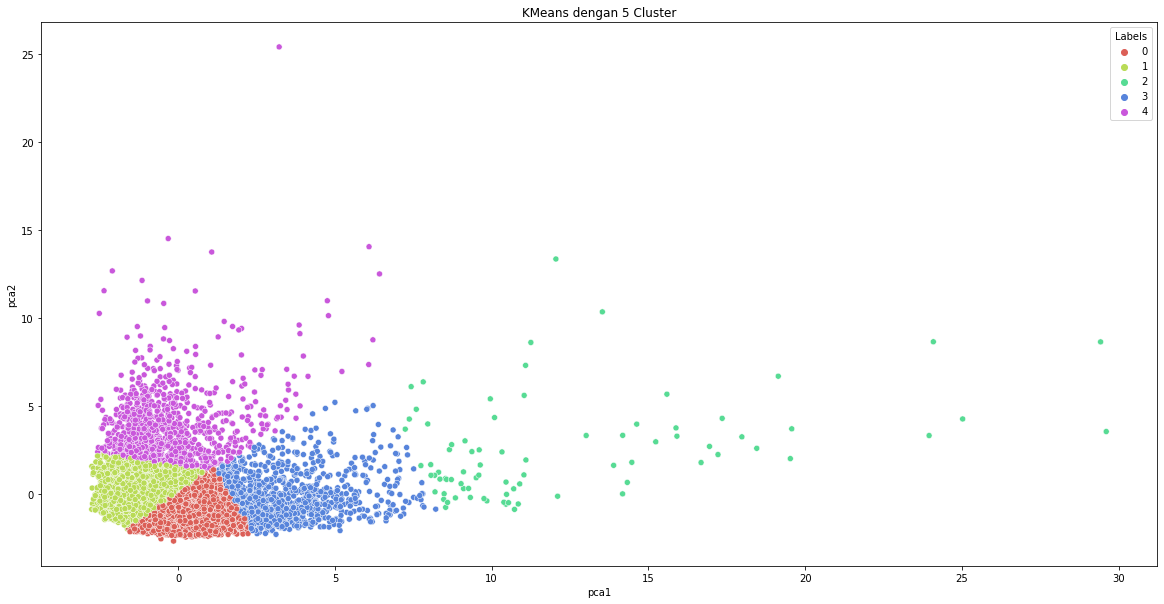

In [30]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(20,10))
sns.scatterplot(pca_df['pca1'], pca_df['pca2'], hue=data_kmeans['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()